# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

city_list = []
country = []
clouds = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_number = 1
units = "imperial"
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    current_city = city
    query_url = f"{base_url}appid={api_key}&q={city}&units={units}"
#     print(query_url)
    city_data = requests.get(query_url).json()
#     print(f"Retrieving data for city {city_number}")
    try:
        print(f"Retrieving data for city {city_number} | " + city_data["name"])
        city_list.append(city_data["name"])
        clouds.append(city_data["clouds"]["all"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        max_temp.append(city_data["main"]["temp_max"])
        wind_speed.append(city_data["wind"]["speed"])
    except KeyError:
        print("City not found. Skipping...")
    city_number = city_number + 1

Retrieving data for city 1 | Ushuaia
Retrieving data for city 2 | Bluff
Retrieving data for city 3 | Ilebo
Retrieving data for city 4 | Challans
Retrieving data for city 5 | Tuatapere
Retrieving data for city 6 | Rikitea
City not found. Skipping...
Retrieving data for city 8 | Tasiilaq
Retrieving data for city 9 | Arraial do Cabo
Retrieving data for city 10 | Isangel
Retrieving data for city 11 | Codrington
Retrieving data for city 12 | Magaria
Retrieving data for city 13 | Caravelas
Retrieving data for city 14 | Atar
City not found. Skipping...
Retrieving data for city 16 | Punta Arenas
Retrieving data for city 17 | Qaanaaq
Retrieving data for city 18 | Marau
Retrieving data for city 19 | Albany
Retrieving data for city 20 | Touros
Retrieving data for city 21 | Avarua
Retrieving data for city 22 | Mount Isa
Retrieving data for city 23 | New Norfolk
Retrieving data for city 24 | Hermanus
Retrieving data for city 25 | Khatanga
Retrieving data for city 26 | Channarayapatna
Retrieving dat

City not found. Skipping...
Retrieving data for city 213 | Buraydah
Retrieving data for city 214 | Port Lincoln
Retrieving data for city 215 | San Cristobal
Retrieving data for city 216 | Hasaki
Retrieving data for city 217 | Vostok
Retrieving data for city 218 | Milkovo
Retrieving data for city 219 | Cine
City not found. Skipping...
Retrieving data for city 221 | Saint Anthony
Retrieving data for city 222 | Tabou
Retrieving data for city 223 | Gillette
Retrieving data for city 224 | Broken Hill
Retrieving data for city 225 | Carolina
Retrieving data for city 226 | Saldanha
Retrieving data for city 227 | Jieshou
Retrieving data for city 228 | Plouzane
Retrieving data for city 229 | Chagoda
Retrieving data for city 230 | San Patricio
Retrieving data for city 231 | Port Hardy
Retrieving data for city 232 | Masallatah
City not found. Skipping...
Retrieving data for city 234 | Zyryanka
City not found. Skipping...
Retrieving data for city 236 | Sydney
City not found. Skipping...
Retrieving 

City not found. Skipping...
Retrieving data for city 423 | Kargil
Retrieving data for city 424 | Husavik
Retrieving data for city 425 | Akniste
Retrieving data for city 426 | Navahrudak
Retrieving data for city 427 | Hunchun
Retrieving data for city 428 | Benguela
Retrieving data for city 429 | Te Anau
Retrieving data for city 430 | Port Hedland
Retrieving data for city 431 | Yermish
Retrieving data for city 432 | Moranbah
Retrieving data for city 433 | Ibra
Retrieving data for city 434 | Oudtshoorn
Retrieving data for city 435 | Bubaque
Retrieving data for city 436 | Rabo de Peixe
Retrieving data for city 437 | Namatanai
Retrieving data for city 438 | Terrace
Retrieving data for city 439 | Changji
Retrieving data for city 440 | Katsuura
Retrieving data for city 441 | Lakes Entrance
Retrieving data for city 442 | Xining
Retrieving data for city 443 | Ciudad del Maiz
Retrieving data for city 444 | Tabas
Retrieving data for city 445 | Puro
City not found. Skipping...
Retrieving data for 

In [4]:
city_data_df = pd.DataFrame({
    "City" : city_list,
    "Cloudiness" : clouds,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
})

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1553961600,66,-54.81,-68.31,53.60,26.40
1,Bluff,0,AU,1553964327,91,-23.58,149.07,63.12,13.24
2,Ilebo,24,CD,1553964327,90,-4.33,20.59,78.69,2.06
3,Challans,0,FR,1553964126,37,46.85,-1.88,66.20,12.75
4,Tuatapere,0,NZ,1553964008,93,-46.13,167.69,54.00,10.45


In [5]:
city_data_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
city_data_df.to_csv(output_data_file, index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

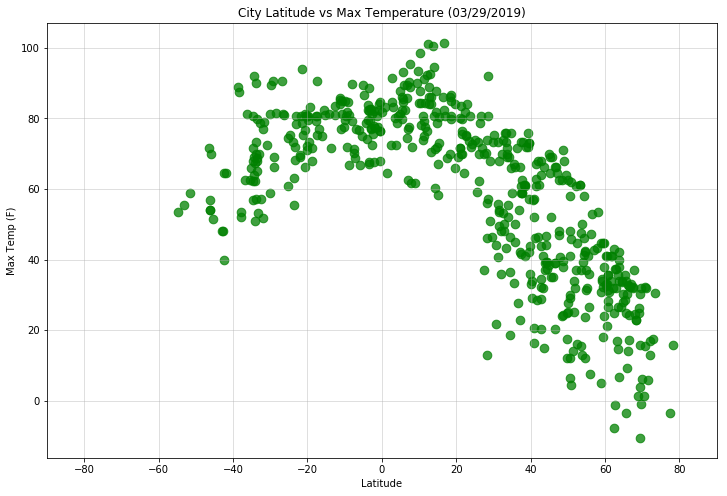

In [11]:
plt.figure(figsize=(12,8))
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, color="green", alpha=0.75,  s=75)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(-90, 90)
plt.title("City Latitude vs Max Temperature (03/29/2019)")
plt.grid(alpha=0.5)


#### Latitude vs. Humidity Plot

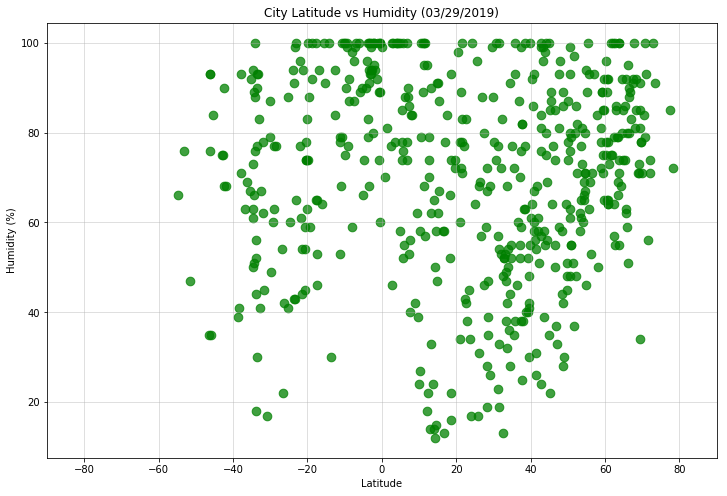

In [12]:
plt.figure(figsize=(12,8))
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, color="green", alpha=0.75, s=75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.title("City Latitude vs Humidity (03/29/2019)")
plt.grid(alpha=0.5)

#### Latitude vs. Cloudiness Plot

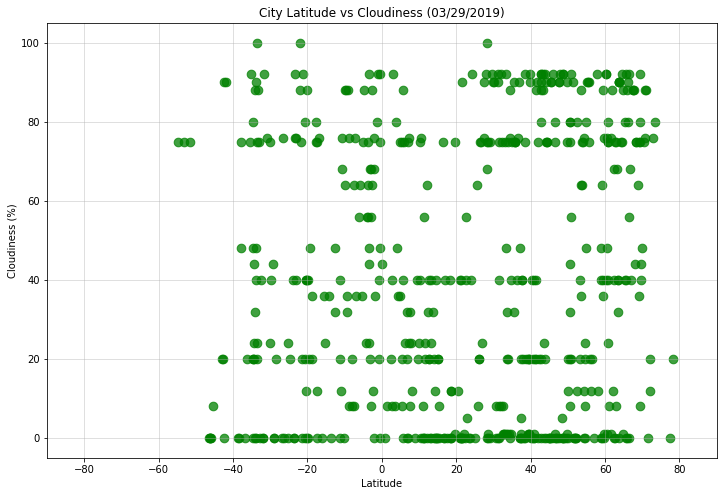

In [9]:
plt.figure(figsize=(12,8))
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, color="green", alpha=0.75,  s=75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.title("City Latitude vs Cloudiness (03/29/2019)")
plt.grid(alpha=0.5)

#### Latitude vs. Wind Speed Plot

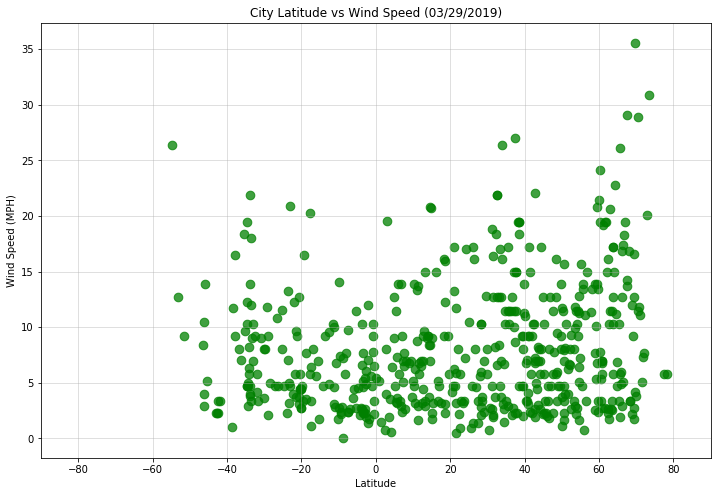

In [10]:
plt.figure(figsize=(12,8))
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, color="green", alpha=0.75,  s=75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-90, 90)
plt.title("City Latitude vs Wind Speed (03/29/2019)")
plt.grid(alpha=0.5)

# OBSERVATIONS
## 1.) Cities with latitudes closer to 0 (closer to the equator) show higher max temperatures which indicates that cities closer to the equator are generally hotter

## 2.) Cities within 20 latitude coordinate points of the equator seem to show higher humidity where other cities away from the equator do not show any trends

## 3.) Wind speeds are generally lower towards the equator, where as speeds tend to increase the further away from the equator that cities are.